<div style="width:50%; float:left;">
    <img src="support_files/AIBS_banner.png" width="430" align="left">
</div>

<div style="width:50%; float:right;">
    <img src="support_files/Dipde_Nick_final.png" width="100" height="100" align="right">
</div>

<div style="width:100%; float:left;">
    <hr>
</div>



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h1>Example: Exponential</h1>
<p> In this example, a single internal dipde population receives from a single external dipde population, however now the background excitatory drive has exponentially distributed synaptic weights.  In this special case, Richardson and Swarbrick <a href='#richardson' id='richardson_first_ref'>[1]</a> the steady-state firing rate of this population can be computed directly.

In [1]:
%matplotlib notebook
import dipde
assert dipde.__version__ == '0.2.1'
import scipy.integrate as spint
import scipy.stats as sps
import itertools
import copy
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as ipw
import logging
from IPython.display import HTML
logging.disable(logging.CRITICAL)

8.6687760498 8.66918899832


<IPython.core.display.Javascript object>


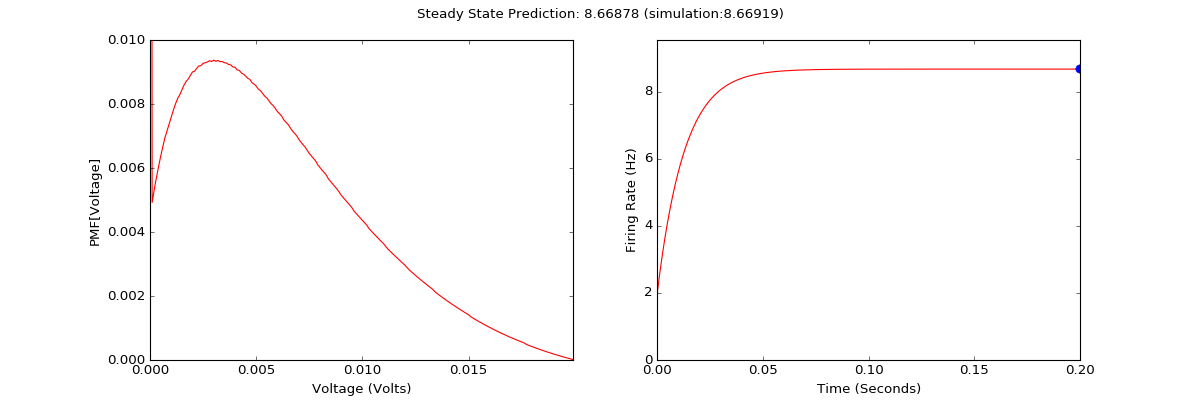

In [4]:
t0 = 0.
dt = .0001
dv = .0001
v_max = .02
tf = .2
tau_m=.02
bgfr = 100
mean_weight = .005

# Simulation
b1 = dipde.ExternalPopulation(bgfr)
i1 = dipde.InternalPopulation(v_min=0, tau_m=tau_m, v_max=v_max, dv=dv, update_method='approx')
b1_i1 = dipde.Connection(b1, i1, 1, weights=(sps.expon(scale=mean_weight),50))
network = dipde.Network([b1, i1], [b1_i1])
simulation_configuration = dipde.SimulationConfiguration(dt, tf, t0=t0)
simulation = dipde.Simulation(network=network, simulation_configuration=simulation_configuration)
simulation.run()

# Steady-state prediction:
f = lambda c: (1./c)*(1-mean_weight*c)**(tau_m*bgfr)*(np.exp(v_max*c)/(1-mean_weight*c)-1.)
y, _ = spint.quad(f,0.0,1./mean_weight)
steady_state_prediction = 1./(tau_m*y)    # >>> 8.6687760498

print steady_state_prediction, i1.firing_rate_record[-1]

# Plot results:
fig, ax = plt.subplots(1,2, figsize=(15,5))
i1.plot_probability_distribution(ax=ax[0], ylim=(0.,100*dv), color='r', show=False)
i1.plot(ax=ax[1], color='r', show=False)
ax[1].plot([tf],[steady_state_prediction], '.', markersize=15)
_ = plt.suptitle('Steady State Prediction: %5.5f (simulation:%5.5f)' % (steady_state_prediction, i1.firing_rate_record[-1]))

<a id='richardson' href='#richardson_first_ref'>[1]</a> Richardson, Magnus J. E. & Swarbrick, Rupert (2010). <a href=https://www2.warwick.ac.uk/fac/sci/systemsbiology/staff/richardson/publications/RSPRL2010.pdf>Firing-Rate Response of a Neuron Receiving Excitatory and Inhibitory Synaptic Shot Noise</a>. Phys. Rev. Lett., 105, 178102.